In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
'''
for i in range(200):
    img=Image.open(f'tf_image/train_{i:03d}.jpg').convert("RGB")
    img.resize((500, 150)).save(f'tf_image/train_{i:03d}.jpg')
for i in range(60):
    img=Image.open(f'tf_image/test_{i:03d}.jpg').convert("RGB")
    img.resize((500, 150)).save(f'tf_image/test_{i:03d}.jpg')
'''

In [24]:
'''
for i in range(200):
    img = Image.open(f'tf_image/train_{i:03}.jpg')
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    resized_img = img.resize((500, 150))
    resized_img.save(f'tf_image/train_{i:03}.jpg')
'''

In [25]:
x_train=[]
for i in range(200):
    img=Image.open(f'tf_image/train_{i:03d}.jpg').convert("RGB")
    img.resize((500, 150)).save(f'tf_image/train_{i:03d}.jpg')
    x_train.append(img_to_array(img)/255)

In [34]:
x_test=[]
for i in range(60):
    img=Image.open(f'tf_image/test_{i:03d}.jpg').convert("RGB")
    img.resize((500, 150)).save(f'tf_image/test_{i:03d}.jpg')
    x_test.append(img_to_array(img)/255)

In [29]:
x_train = np.array(x_train)
x_train.shape

(200, 150, 500, 3)

In [51]:
x_train.shape[1:]

(150, 500, 3)

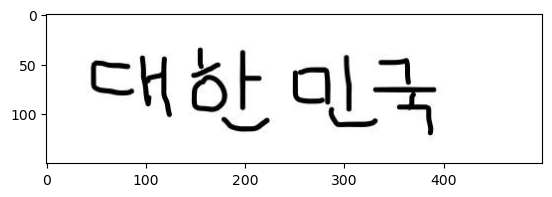

In [42]:
plt.imshow(x_train[0])

In [37]:
x_test = np.array(x_test)
x_test.shape

(60, 150, 500, 3)

In [38]:
y_train = [i // 10 for i in range(200)]
y_train = to_categorical(y_train, 20)

In [40]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [41]:
y_train.shape

(200, 20)

In [60]:
y_test = [i // 3 for i in range(60)]
y_test = to_categorical(y_test, 20)

In [61]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [62]:
y_test.shape

(60, 20)

In [90]:
model = Sequential()
# Conv2D(필터갯수, 필터크기, 입력이미지크기, 활성화함수)
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=x_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) # 1차원 구조로 펼치기
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

In [91]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [92]:
modelpath="./data/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='loss', patience=15)

In [93]:
history = model.fit(x_train, y_train, epochs=35, batch_size=25, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: loss improved from inf to 36.75972, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 2: loss improved from 36.75972 to 2.50327, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 3: loss improved from 2.50327 to 1.59519, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 4: loss improved from 1.59519 to 0.77588, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 5: loss improved from 0.77588 to 0.40895, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 6: loss improved from 0.40895 to 0.18188, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 7: loss improved from 0.18188 to 0.07439, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 8: loss did not improve from 0.07439

Epoch 9: loss did not improve from 0.07439

Epoch 10: loss improved from 0.07439 to 0.04628, saving model to ./data/model\MNIST_CNN.hdf5

Epoch 11: loss did not improve from 0.04628

Epoch 12: loss did not improve from 0.04628

Epoch 13: loss improved from 0.04628 to 0.03644, saving model to ./data/model\

In [94]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2/2 [==============================] - 1s 306ms/step - loss: 1.3344 - accuracy: 0.6500

 Test Accuracy: 0.6500
